1. Steps 
- Import Data
- Chart for fed funds 3m ,1y ,2y , 5y  and 10y
- Chart for fed funds 1 month later
- Chart for fed months another month later
- Animate from first month to 3rd month
- Add labels with levelss onto chart. 

In [1]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=""
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace("table",'table style="display:inline"'),raw=True)

In [2]:
from IPython.display import clear_output
import datetime
import pandas as pd
from openpyxl import load_workbook
import os
import calendar
import matplotlib.colors as mcolors
import copy
from math import sqrt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')
#import xmml.etree.cElementTree as ElemTree
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
%matplotlib notebook

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [3]:
pio.templates["draft"] = go.layout.Template(
    layout_annotations=[
        dict(
            name="draft watermark",
            text="MSS DRAFT",
            textangle=-30,
            opacity=0.1,
            font=dict(color="black", size=75),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            showarrow=False,
        )
    ]
)
pio.templates.default = "none+draft"

### Import Data

In [4]:
df = pd.read_csv(r'FRB_H15_full2.csv',index_col=0,skiprows =5)
df = df[18:] #Get rid of missing data
column_names = []
for i in df.columns:
    i = i[7:-4]
    try:
        if i[1] == "0":
            j=i[-1]+i[0]
        else:
            j=i[-2]+i[-1]+i[0]
    except:
        print("Passed FedFunds")
    column_names.append(j)
print(list(df.columns),"\n", column_names)
df.columns= column_names
rolling_window = 60
x= copy.deepcopy(df)

['RIFLGFCM01_N.M', 'RIFLGFCM03_N.M', 'RIFLGFCM06_N.M', 'RIFLGFCY01_N.M', 'RIFLGFCY02_N.M', 'RIFLGFCY03_N.M', 'RIFLGFCY05_N.M', 'RIFLGFCY07_N.M', 'RIFLGFCY10_N.M', 'RIFLGFCY20_N.M', 'RIFLGFCY30_N.M'] 
 ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y']


In [6]:
df =copy.deepcopy(x)
df2 = pd.DataFrame()
for col in column_names:
    sq_vol = (df[col].diff().iloc[1:])**2
    sq_vol_sum= sq_vol.rolling(rolling_window).sum()/rolling_window
    df2[f"{col} Vol"] = sq_vol_sum.apply(np.sqrt)*np.sqrt(256)
    
df=df[rolling_window+1:]
df2=df2[rolling_window:]

In [8]:
values2 = []
values2_list = []
for i in range(len(df2)):
    values2.append(df2.iloc[i].tolist())
for i in range(len(values2)):
    for j in range(len(values2[i])):
        values2_list.append(values2[i][j])

In [9]:
df3 = pd.DataFrame(columns = ["A","B","C"])
inverted= ((df["10Y"]-df["2Y"])).tolist()
inverted1= ((df["10Y"]-df["2Y"])>0).tolist()
inverted = [[i]*len(column_names) for i in inverted]
inverted1 = [[i]*len(column_names) for i in inverted1]
inverted_list = []
inverted_list1 = []
for i in range(len(inverted)):
    for j in range(len(inverted[i])):
        inverted_list.append(inverted[i][j])
        inverted_list1.append(inverted1[i][j])

dates = [[i]*len(column_names) for i in df.index.tolist()]
dates_list = []
for i in range(len(dates)):
    for j in range(len(dates[i])):
        dates_list.append(dates[i][j])
        
values = []
values_list = []
for i in range(len(df)):
    values.append(df.iloc[i].tolist())
for i in range(len(values)):
    for j in range(len(values[i])):
        values_list.append(values[i][j])

df3["A"] = dates_list
curve_list= [i for i in column_names]*round(len(list(df3.index))/len(list(column_names)))
df3["B"] = curve_list
df3["C"] = values_list
df3.columns=["Date","Curve","Curve Level"]
df3["Vol"] = values2_list
df3["Year"]= df3["Date"].str[:4].tolist()
df3["inv"]= inverted_list1
df3["Curve Steepness"]= inverted_list

,Date,Curve,Curve Level,Vol,Year,inv,Curve Steepness
0,2006-08,1M,5.16,3.252962,2006,False,-0.02
1,2006-08,3M,5.09,2.911311,2006,False,-0.02
2,2006-08,6M,5.17,2.871989,2006,False,-0.02
3,2006-08,1Y,5.08,2.984976,2006,False,-0.02
4,2006-08,2Y,4.90,3.660586,2006,False,-0.02
,Date,Curve,Curve Level,Vol,Year,inv,Curve Steepness
2261,2023-09,5Y,4.49,3.773310,2023,False,-0.64
2262,2023-09,7Y,4.46,3.658371,2023,False,-0.64
2263,2023-09,10Y,4.38,3.550654,2023,False,-0.64
2264,2023-09,20Y,4.65,3.302427,2023,False,-0.64


In [20]:
import plotly.express as px
fig1 =px.line(df3,line_shape = "spline",\
        x="Curve", y="Curve Level", animation_frame="Date",animation_group="Curve",color="inv",\
        hover_name="Curve Level",title="Monthly Evolution of US Yield Curve (2006 - 2023)",\
        color_discrete_sequence=["Red","Blue"],template= "none+draft" ,markers=False,range_y=[0,6])

In [21]:
import plotly.express as px
fig2 =px.scatter(df3,\
        x="Curve", y="Curve Level", animation_frame="Date",color="Curve Steepness",\
        hover_name="Curve Level",title="Monthly Evolution of US Yield Curve (2006 - 2023)",\
        text="Curve Level" ,
        color_continuous_scale=px.colors.sequential.Viridis,range_y=[0,6.5],
        size="Vol", size_max=40)


In [22]:
fig3 = go.Figure(
    data=fig2.data + fig1.data,
    frames=[
        go.Frame(data=fr1.data + fr2.data, name=fr1.name)
        for fr1, fr2 in zip(fig2.frames, fig1.frames)
    ],
    layout=fig2.layout,)
print("Source: US Federal Reserve")
fig3.update_traces(textposition='top center')

Source: US Federal Reserve


1. Line curve represents whether the curve is inverted (red) or "upright" (blue)
2. Bubble colour represents steepness of the curve (2s10s)
3. Bubble size represents 3m moving average volatility. 

In [306]:
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

In [248]:
import plotly.express as px
df22 = px.data.gapminder()
px.scatter(df22, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [166]:
df3

,A,B,C
0,2008-01,1M,2.74
1,2008-01,3M,2.82
2,2008-01,6M,2.84
3,2008-01,1Y,2.71
4,2008-01,2Y,2.48
...,...,...,...
2074,2023-09,5Y,4.49
2075,2023-09,7Y,4.46
2076,2023-09,10Y,4.38
2077,2023-09,20Y,4.65


In [25]:
df.T

Time Period,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
1M,2.74,2.27,1.35,1.07,1.76,1.72,1.60,1.68,0.89,0.29,...,3.90,4.52,4.64,4.49,4.17,5.49,5.20,5.39,5.54,5.53
3M,2.82,2.17,1.28,1.31,1.76,1.89,1.66,1.75,1.15,0.69,...,4.36,4.69,4.79,4.86,5.07,5.31,5.42,5.49,5.56,5.56
6M,2.84,2.10,1.51,1.58,1.86,2.19,1.98,1.97,1.64,1.23,...,4.71,4.80,4.97,4.99,4.99,5.27,5.42,5.53,5.54,5.51
1Y,2.71,2.05,1.54,1.74,2.06,2.42,2.28,2.18,1.91,1.42,...,4.68,4.69,4.93,4.68,4.68,4.91,5.24,5.37,5.37,5.44
2Y,2.48,1.97,1.62,2.05,2.45,2.77,2.57,2.42,2.08,1.61,...,4.29,4.21,4.53,4.30,4.02,4.13,4.64,4.83,4.90,5.02
3Y,2.51,2.19,1.80,2.23,2.69,3.08,2.87,2.70,2.32,1.86,...,4.05,3.91,4.23,4.09,3.76,3.82,4.27,4.47,4.59,4.74
5Y,2.98,2.78,2.48,2.84,3.15,3.49,3.30,3.14,2.88,2.73,...,3.76,3.64,3.94,3.82,3.54,3.59,3.95,4.14,4.31,4.49
7Y,3.31,3.21,2.93,3.19,3.46,3.73,3.60,3.46,3.25,3.19,...,3.72,3.59,3.86,3.77,3.50,3.58,3.85,4.03,4.26,4.46
10Y,3.74,3.74,3.51,3.68,3.88,4.10,4.01,3.89,3.69,3.81,...,3.62,3.53,3.75,3.66,3.46,3.57,3.75,3.90,4.17,4.38
20Y,4.35,4.49,4.36,4.44,4.60,4.74,4.62,4.53,4.32,4.45,...,3.87,3.81,3.95,3.94,3.80,3.96,4.04,4.15,4.46,4.65


In [20]:
px.scatter(df.reset_index(), x="Time Period", y=df.columns,
           log_x=False, range_y=[0,6])

<IPython.core.display.Javascript object>


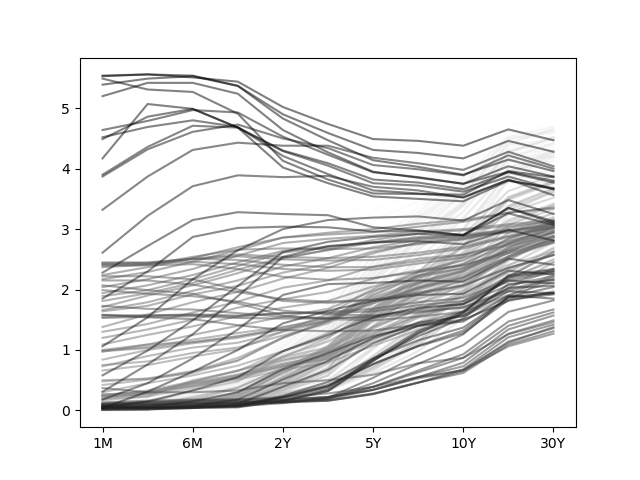

In [12]:
fig, ax1 = plt.subplots()
df.T.plot(kind = "line",ax = ax1, cmap = "Greys", alpha = 0.5)
plt.legend().remove()
plt.show()

<IPython.core.display.Javascript object>


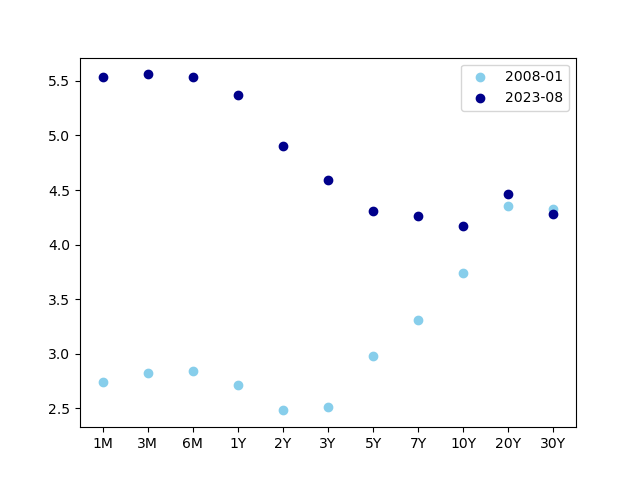

In [6]:
fig, ax = plt.subplots()

ax.scatter(df[0:1].T.index,df[0:1].T,c="skyblue",label = df[0:1].T.columns[-1])
ax.scatter(df[-2:-1].T.index,df[-2:-1].T,c="darkblue",label = df[-2:-1].T.columns[-1])

ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
df.T.plot(kind = "line",ax = ax, cmap = "Greys", alpha = 0.5)


def update(frame):
    print(frame)
    # for each frame, update the data stored on each artist.
    ax.clear()
    #ax.plot(df.T,cmap="Greys",linestyle="-", alpha = 0.5)
    ax.plot(df[frame-1:frame].T, c = "darkblue",linestyle="-")
    ax.set(ylim=[0,6])
    #plt.title(f"US Fed Funds Curve {df[frame-1:frame].index[-1]} (year - month)")
    plt.title(f"US Fed Funds Curve Evolution")
    plt.xlabel("Maturity")
    plt.ylabel("Rate")
    plt.legend().remove()
    


ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=100)

#pause
ani.event_source.stop()

#unpause
ani.event_source.start()


plt.show()

<IPython.core.display.Javascript object>


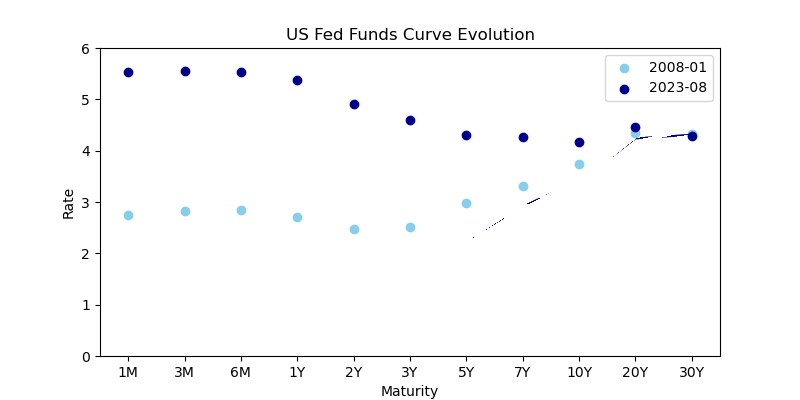

In [12]:
fig, ax = plt.subplots(figsize = (8,4))

def update(frame):
    print(frame)
    # for each frame, update the data stored on each artist.
    ax.clear()
    ax.scatter(df[0:1].T.index,df[0:1].T,c="skyblue",label = df[0:1].T.columns[-1])
    ax.scatter(df[-2:-1].T.index,df[-2:-1].T,c="darkblue",label = df[-2:-1].T.columns[-1])

    #ax.plot(df[frame-2:frame-1].T, c = "skyblue")
    ax.plot(df[frame-1:frame].T, c = "darkblue",linestyle="-", label ="Dynamic Treasury Rate")
    #ax.scatter(df[frame-1:frame].T.index,df[frame-1:frame].T.iloc[::-1],c="red")
    ax.legend(loc =1 )

    
    ax.set(ylim=[0,6])
    #plt.title(f"US Fed Funds Curve {df[frame-1:frame].index[-1]} (year - month)")
    plt.title(f"US Fed Funds Curve Evolution")
    plt.xlabel("Maturity")
    plt.ylabel("Rate")
    


ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=100,blit=False)
plt.show()

In [10]:
px.data.gapminder()

NameError: name 'px' is not defined

In [ ]:
fig2, ax2 = plt.subplots()

def update(frame):
    print(frame)
    # for each frame, update the data stored on each artist.
    ax2.clear()
    #ax2.plot(df[frame-2:frame-1].T, c = "skyblue")
    scat = ax2.scatter(df[frame-1:frame].T.index,df[frame-1:frame].T.iloc[::-1],c="red")

    
    ax2.set(xlim=[0,5])
    #plt.title(f"US Fed Funds Curve {df[frame-1:frame].index[-1]} (year - month)")
    ax2.title(f"US Fed Funds Curve scatter")
    ax2.xlabel("Maturity")
    ax2.ylabel("Rate")
    return(scat)
    


ani = animation.FuncAnimation(fig=fig2, func=update, frames=100, interval=1)
plt.show()

In [ ]:
fig3, ax3 = plt.subplots()
t = np.linspace(0, 3, 100)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t
v02 = 5
z2 = g * t**2 / 2 + v02 * t
scat = ax3.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax3.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax3.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax3.legend()
def update2(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot5
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    plt.title("Ball Falling ")
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig3, func=update2, frames=100, interval=30)
plt.show()